In [17]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import numpy as ny
import pandas as ps
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn import tree


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [18]:
def performance_evaluation(tp, tn, fp, fn, beta=1.0):

   accuracy = (tp + tn) / (tp + fp + fn + tn)
   sensitivity = tp / (tp + fn)
   specificity = tn / (fp + tn)
   precision = tp / (tp + fp)
   recall = sensitivity
   f_score = ( (beta**2 + 1) * precision * recall) / (beta**2 * precision + recall)
   auc = (sensitivity + specificity) / 2
   youden = sensitivity - (1 - specificity)
   p_plus = sensitivity / (1 - specificity)
   p_minus = (1 - sensitivity) / specificity
   dp = (ny.sqrt(3) / ny.pi) * (ny.log(sensitivity/(1 - sensitivity) + ny.log(specificity/(1 - specificity))))

   result = {}
   result["tp"] = tp
   result["tn"] = tn
   result["fp"] = fp
   result["fn"] = fn
   result["accuracy"] = accuracy
   result["sensitivity"] = sensitivity
   result["specificity"] = specificity
   result["precision"] = precision
   result["recall"] = recall
   result["f-score"] = f_score
   result["AUC"] = auc
   result["Youden"] = youden
   result["p+"] = p_plus
   result["p-"] = p_minus
   result["DP"] = dp

   return result

In [19]:
set = ps.read_csv("voice_1.csv")

In [20]:
set.label = [1 if each == "female" else 0 for each in set.label]

In [21]:
y =set.label.values
x = set.drop(['label'],axis=1)
x

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512
1,0.082526,0.080918,0.061245,0.008307,0.129657,0.121350,15.891002,402.932610,0.906001,0.561684,0.000000,0.082526,0.087384,0.015810,0.271186,0.007979,0.007812,0.015625,0.007812,0.043478
2,0.107162,0.084951,0.114281,0.024021,0.159411,0.135390,24.173676,665.149805,0.920756,0.676250,0.000000,0.107162,0.132119,0.015810,0.266667,0.008247,0.007812,0.015625,0.007812,0.117647
3,0.096725,0.083800,0.086859,0.017592,0.173168,0.155576,20.307146,577.369776,0.939914,0.687643,0.000000,0.096725,0.100796,0.016393,0.271186,0.008185,0.007812,0.023438,0.015625,0.048780
4,0.163140,0.053749,0.167346,0.158988,0.186243,0.027255,7.724359,85.520999,0.871484,0.425117,0.167346,0.163140,0.159522,0.017271,0.217391,0.172776,0.166016,0.185547,0.019531,0.310000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3098,0.196590,0.057834,0.214406,0.134126,0.245734,0.111608,1.522354,5.287497,0.903398,0.291057,0.250140,0.196590,0.124676,0.047244,0.277457,1.468229,0.023438,21.515625,21.492188,0.082438
3099,0.200742,0.035396,0.200833,0.182083,0.224583,0.042500,1.873618,5.842669,0.864797,0.250955,0.190000,0.200742,0.176234,0.049080,0.268156,1.317555,0.023438,21.562500,21.539062,0.035075
3100,0.230992,0.031246,0.229988,0.214678,0.251762,0.037084,1.890016,5.971598,0.834185,0.140839,0.221823,0.230992,0.191741,0.047291,0.277457,2.288628,0.023438,21.796875,21.773438,0.111634
3101,0.178261,0.062283,0.179499,0.138831,0.233255,0.094424,1.464983,5.498037,0.925515,0.460198,0.179967,0.178261,0.128866,0.050580,0.277457,1.635298,0.023438,21.843750,21.820312,0.053843


In [22]:
xtrain, xtest, ytrain, ytest = train_test_split (x,y,test_size=0.3,random_state = 30)
dectree = DecisionTreeClassifier()
dectree.fit(xtrain, ytrain)
DT_f=dectree.predict(xtest) 
conf = confusion_matrix(ytest, DT_f)

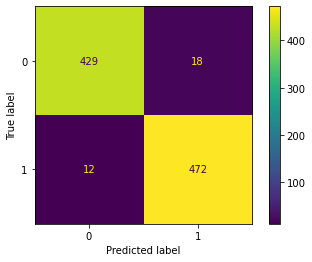

In [23]:
plot_confusion_matrix(dectree, xtest, ytest)  
plt.show()

In [24]:
TP = conf[1,1]
FP = conf[0,1]
TN = conf[0,0]
FN = conf[1,0]
DT_results = performance_evaluation(TP, TN, FP, FN)
DT_results
DT_results.get("Youden")

0.9349381551944089